Ecuación de estado de los gases ideales

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

En unidades del Sistema Internacional, la ecuación de estado de un gas ideal dice
$$p V = n N_A k_B T$$
donde $p$, $V$ y $T$ son la presión (medida en Pascales -- Pa), el volúmen (medido en Angstroms cúbicos -- $\textnormal{\AA}^3$), y la temperatura (medida en Kelvin -- K); $n$ es la cantidad de sustancia (medida en moles -- mol), y $N_A = 6.02214076 \times 10^{23} \textnormal{mol}^{- 1}$ es la constante de Avogadro; y $k_B = 1.380649 \times 10^{- 23} \textnormal{J} \textnormal{K}^{- 1}$ es la constante de Boltzmann (medida en Julios sobre Kelvin -- $\textnormal{J} \textnormal{K}^{-1}$)

Para cambiar el sistema de unidades debemos usar las ecuaciones definidas por el sistema de unidades `real`
- $p_{\textnormal{atm}} = 101 325 p_{\textnormal{Pa}}$
- $V_{\textnormal{\AA}^3}= 10^{30} V_{\textnormal{m}^3}$
- $(k_B)_{\textnormal{kcal} / (\textnormal{mol} \cdot \textnormal{K})} = \frac{N_A}{4184} (k_B)_{J / K}$

En unidades `real` la ecuación de estado de un gas ideal se lee
$$p V = \frac{10^{30}}{101 325} n k_B T$$

In [8]:
atmosphere = 101325  # Pa
cubic_metre = 1e30  # angstrom^3

avogadro = 6.02214076e23  # mol^{-1}
kcal = 4184  # J
si_boltzmann = 1.380649e-23  # J K^{-1}
real_boltzmann = (avogadro / kcal) * si_boltzmann  # (kcal mol^{-1}) K^{-1}

In [11]:
temperatures = tuple(range(100, 1000 + 1, 100))
volumes = tuple(range(10**6, 9 * 10**6 + 1, 10**6))
num_particles = 10**4
pressures = {}
sufix = '__termodinamica'
for temperature in temperatures:
  pressures[temperature] = tuple(map(
    lambda vol: (cubic_metre / atmosphere) * num_particles * real_boltzmann * temperature / vol,
    volumes
  ))

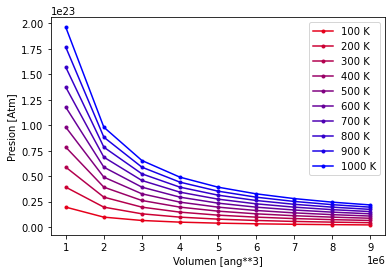

In [13]:
fig, ax = plt.subplots()
ax.set(xlabel = 'Volumen [ang**3]', ylabel='Presion [Atm]')
for temperature in temperatures:
  rgb_tuple = (
    1 - temperature / max(temperatures), 0, temperature / max(temperatures)
  )
  ax.plot(
    volumes,
    pressures[temperature],
    marker='o',
    markersize=3,
    color=rgb_tuple,
    label=f'{temperature} K'
  )

ax.legend()

fig.savefig('../dat/idealGasStateEquation.png')